# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Gloria Natasya Irene Sidebang
- **Email:** glorianatasyaaa@gmail.com
- **ID Dicoding:** glorianatasya

## Menentukan Pertanyaan Bisnis

- Berapa jumlah rata-rata persewaan sepeda per hari dan bagaimana variasinya sepanjang bulan?
- Bagaimana hubungan kondisi cuaca dengan jumlah rata-rata penyewaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [2]:
#Import data from github
github_urls = ['https://raw.githubusercontent.com/glorianatasyaaa/bike-sharing-dataset/master/day.csv',
               'https://raw.githubusercontent.com/glorianatasyaaa/bike-sharing-dataset/master/hour.csv']

day_df = pd.read_csv(github_urls[0])
hour_df = pd.read_csv(github_urls[1])

### Assessing Data

#### Data Info

In [3]:
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [4]:
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Missing Value

In [7]:
missing_values_count_hour = hour_df.isnull().sum()
missing_values_count_day = day_df.isnull().sum()

print("Missing Value Day File")
print(missing_values_count_day[0:5])

print("Missing Value Hour File")
print(missing_values_count_hour[0:5])

Missing Value Day File
instant    0
dteday     0
season     0
yr         0
mnth       0
dtype: int64
Missing Value Hour File
instant    0
dteday     0
season     0
yr         0
mnth       0
dtype: int64


#### Duplicate Data


In [8]:
print(f"Jumlah data duplikat file hour {hour_df.duplicated().sum()}")
print(f"Jumlah data duplikat file day {day_df.duplicated().sum()}")


Jumlah data duplikat file hour 0
Jumlah data duplikat file day 0


#### Outlier

In [9]:
#Checking ouliers in Target varibale "cnt".

Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = hour_df[(hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

In [10]:
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = day_df[(day_df['cnt'] < lower_bound) | (day_df['cnt'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Terlihat bahwa beberapa record terdeteksi sebagai outlier di kolom 'total' ditantai dengan warna background hitam pada data hour

### Cleaning Data

#### Changing Column Names

In [11]:
column_mapping = {'dteday': 'date', 'yr': 'year', 'mnth':'month','temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

day_df.rename(columns=column_mapping, inplace=True)
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
column_mapping = {'dteday': 'date', 'yr' : 'year','hr': 'hour', 'mnth':'month','temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

hour_df.rename(columns=column_mapping, inplace=True)
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Change Data Type 

In [13]:
# Change value in column year 0 : 2011 ; 1 : 2012
hour_df['year'] = hour_df['year'].replace({0: 2011, 1:2012})
day_df['year'] = day_df['year'].replace({0: 2011, 1:2012})


In [14]:
# Change aldate column to datetype
hour_df['date'] = pd.to_datetime(hour_df['date'])
day_df['date'] = pd.to_datetime(day_df['date'])

In [15]:
#changing the values to real names of seasons to understand better
hour_df['season'] = hour_df['season'].astype('category')
hour_df['season'] = hour_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
print(f"Nilai unik kolom sesason data hour : {hour_df['season'].unique()}")

day_df['season'] = day_df['season'].astype('category')
day_df['season'] = day_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
print(f"Nilai unik kolom sesason data hour : {day_df['season'].unique()}")

Nilai unik kolom sesason data hour : ['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Winter', 'Spring', 'Summer', 'Autumn']
Nilai unik kolom sesason data hour : ['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Winter', 'Spring', 'Summer', 'Autumn']


#### Removing Outlier


In [16]:
hour_df = hour_df[(hour_df['total'] >= lower_bound) & (hour_df['total'] <= upper_bound)]
print("shape after outliers removal :",hour_df.shape)

shape after outliers removal : (17379, 17)


## Exploratory Data Analysis (EDA)

### Merge Dataset

In [17]:
bike_df = hour_df.merge(day_df, on='date', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,date,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temperature_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,total_day
0,1,2011-01-01,Winter,2011,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Winter,2011,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Winter,2011,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Winter,2011,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Winter,2011,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### Label Kolom Weathersit

In [18]:
bike_df['weathersit_day'] = bike_df['weathersit_day'].astype('category')
bike_df['weathersit_day'] = bike_df['weathersit_day'].cat.rename_categories({
    1: 'Clear',
    2: 'Mist ',
    3: 'Light Rain',
    4: 'Heavy Rain'})
print(f"Nilai unik kolom cuaca data day : {bike_df['weathersit_day'].unique()}")

Nilai unik kolom cuaca data day : ['Mist ', 'Clear', 'Light Rain']
Categories (3, object): ['Clear', 'Mist ', 'Light Rain']


In [19]:
bike_df['weathersit_hour'] = bike_df['weathersit_hour'].astype('category')
bike_df['weathersit_hour'] = bike_df['weathersit_hour'].cat.rename_categories({
    1: 'Clear',
    2: 'Mist ',
    3: 'Light Rain',
    4: 'Heavy Rain'})
print(f"Nilai unik kolom cuaca data hour : {bike_df['weathersit_hour'].unique()}")

Nilai unik kolom cuaca data hour : ['Clear', 'Mist ', 'Light Rain', 'Heavy Rain']
Categories (4, object): ['Clear', 'Mist ', 'Light Rain', 'Heavy Rain']


In [20]:
bike_df.describe(include="all")

,instant_hour,date,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temperature_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,total_day
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,...,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Summer,NaN,NaN,NaN,NaN,NaN,NaN,Clear,...,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,...,NaN,NaN,11040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,...,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,NaN,...,2.005771,0.465431,NaN,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,NaN,NaN,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,NaN,NaN,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,...,1.000000,0.000000,NaN,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000


In [21]:
bike_df.groupby(by="season_day").agg({
    'total_day' : ['mean','max', 'min'],
})

total_day            
                   mean   max   min
season_day                         
Winter      2635.348185  7836   431
Spring      4995.253119  8362   795
Summer      5654.093194  8714  1115
Autumn      4765.366021  8555    22

In [22]:
bike_df.groupby(by="weathersit_day").agg({
    'total_day' : ['mean','max', 'min'],
})

total_day           
                       mean   max  min
weathersit_day                        
Clear           4895.177083  8714  431
Mist            4062.717595  8362  605
Light Rain      1914.700855  4639   22

In [23]:
bike_df.groupby(by="hour").agg({
    'total_hour' : ['mean','max', 'min'],
})

total_hour         
            mean  max min
hour                     
0      53.898072  283   2
1      33.375691  168   1
2      22.869930  132   1
3      11.727403   79   1
4       6.352941   28   1
5      19.889819   66   1
6      76.044138  213   1
7     212.064649  596   1
8     359.011004  839   5
9     219.309491  426  14
10    173.668501  539   8
11    208.143054  663  10
12    253.315934  776   3
13    253.661180  760  11
14    240.949246  750  12
15    251.233196  750   7
16    311.983562  783  11
17    461.452055  976  15
18    425.510989  977  23
19    311.523352  743  11
20    226.030220  567  11
21    172.314560  584   6
22    131.335165  502   9
23     87.831044  256   2

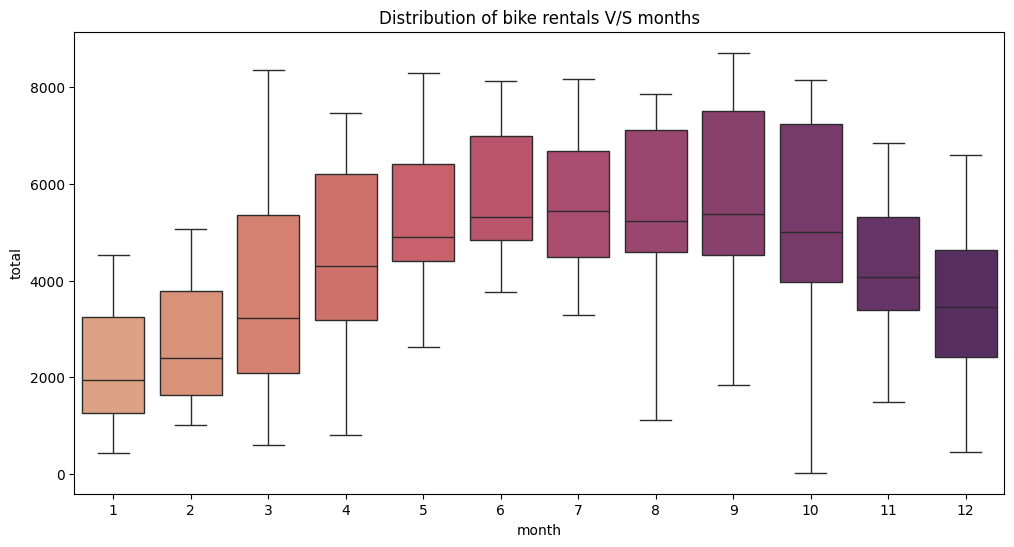

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='total', data=day_df, palette='flare')
plt.title('Distribution of bike rentals V/S months')
plt.show()

Text(0.5, 1.0, 'Distribution of bike rentals V/S days of the week')

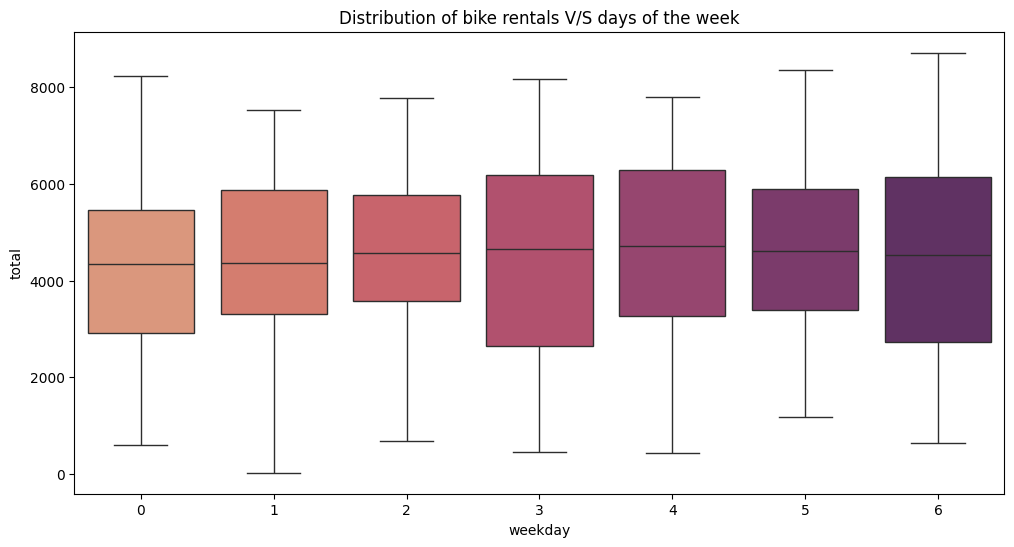

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='total', data=day_df, palette='flare')
plt.title('Distribution of bike rentals V/S days of the week')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah rata-rata persewaan sepeda per hari dan bagaimana variasinya sepanjang bulan?

AttributeError: 'BoxPlotContainer' object has no attribute 'patches'

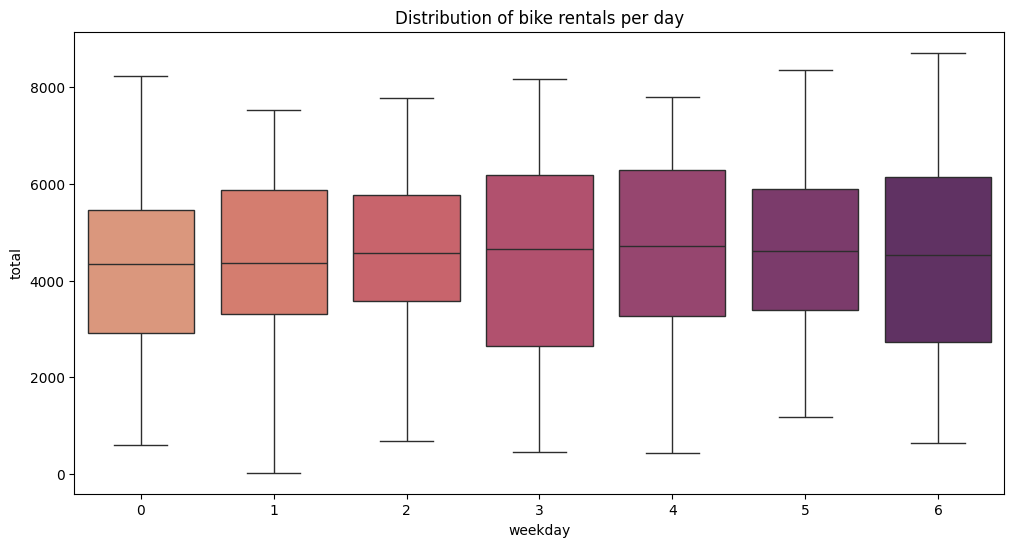

In [80]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='weekday', y='total', data=day_df,palette='flare')
plt.title('Distribution of bike rentals per day')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

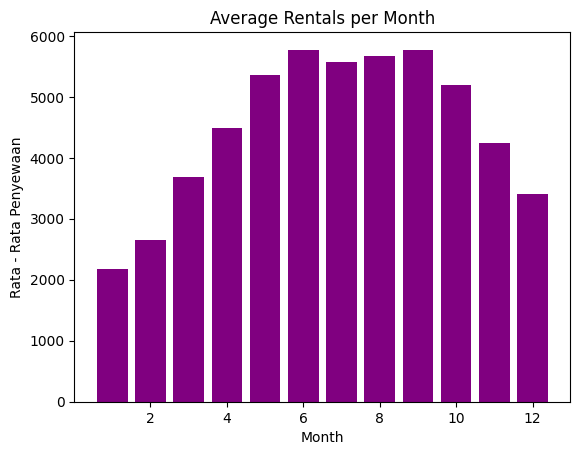

In [76]:
rental_bulan = day_df.groupby('month')['total'].mean()

plt.bar(rental_bulan.index, rental_bulan.values, color='purple')

plt.title('Average Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Rata - Rata Penyewaan')

plt.show()

### Pertanyaan 2: Bagaimana hubungan kondisi cuaca dengan jumlah rata-rata penyewaan?

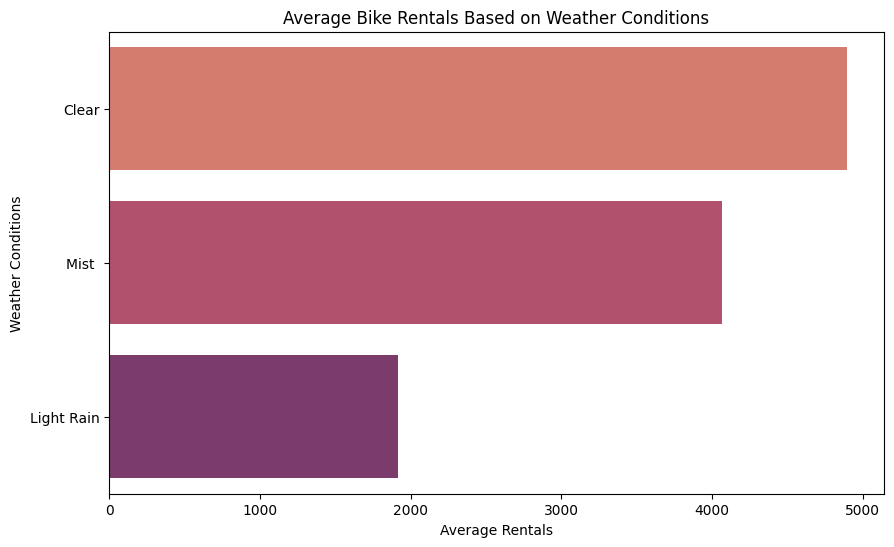

In [79]:
avg_weather = bike_df.groupby('weathersit_day')['total_day'].mean().reset_index().sort_values("total_day")

plt.figure(figsize=(10, 6))
sns.barplot(x='total_day', y='weathersit_day', data=avg_weather, palette='flare')

plt.title('Average Bike Rentals Based on Weather Conditions')
plt.xlabel('Average Rentals')
plt.ylabel('Weather Conditions')

plt.show()

## Conclusion

- **Conclution pertanyaan 1 :** <br> <br>
 Jumlah rata-rata penyewaan per hari berada di angka 4000an dan cenderung stabil tiap harinya. Namun, jika dilihat dari total penyewaan per bulan terjadi tren yang cendreung meningkat pada bulan Januari-July, stabil pada July-September dan menurun pada September-Desember

 <br>

- **Conclution pertanyaan 2 :** <br> <br>
Kondisi cuaca sangat memengaruhi jumlah penyewaan terlihat pada saat kondisi cerah jumlah penyewaan mencapai 5000 dan mengalami penurunan drastis ketika kondisi hujan ringgan sampai setengahnya yaitu kurang dari 2000.


In [81]:
bike_df.to_csv("bike_data.csv", index = False)